#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**

###**Implement a Feed forward neural network with backpropagation for one output.**

The process of implementing a neural network with one output is very similar to logistic regression.

Neural Network works in two steps:

Feed Forword Back propagation

In [30]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [31]:
# Set seed for reproducibility
np.random.seed(0)

# Generate the data
X, y = datasets.make_moons(100, noise=0.10)

print(X)

[[-0.05348369  0.99258199]
 [ 1.81989987 -0.17559999]
 [ 0.95535658  0.05999942]
 [ 0.01558147  0.11081703]
 [ 0.96454939 -0.51276464]
 [ 1.98889686  0.30384984]
 [ 0.53549261  0.68257563]
 [ 0.92004283 -0.58127765]
 [ 0.01206304  0.29518806]
 [ 1.88346177  0.28446179]
 [-0.08064949  0.41062938]
 [ 1.93512761 -0.05897236]
 [ 1.31504601 -0.56540653]
 [ 0.85667004  0.89282872]
 [ 0.75641531  0.4715998 ]
 [-0.35242078  0.99888439]
 [ 0.20681479  1.06917351]
 [ 0.12280354  0.94090393]
 [-0.42463668  0.82968195]
 [ 0.96867858  0.51144583]
 [-0.81695256  0.4692567 ]
 [ 0.34228955 -0.19550647]
 [ 0.88254314  0.37839804]
 [ 0.75337171 -0.46959342]
 [-0.86421327  0.12595569]
 [-0.91417342 -0.08494092]
 [ 0.81989526  0.35435414]
 [ 2.06045723  0.32569418]
 [ 1.61496097 -0.20024177]
 [ 1.22516082 -0.36530949]
 [ 0.29040666 -0.11399058]
 [ 1.24895872 -0.6375463 ]
 [ 1.84706118 -0.03404951]
 [ 0.53663514 -0.38453542]
 [ 0.0242806   0.47944808]
 [-0.1641747   0.99217162]
 [ 0.3112303   0.94315139]
 

In [32]:
print(y)

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


In [33]:
# Print the data shapes
print(X.shape)
print(y.shape)

(100, 2)
(100,)


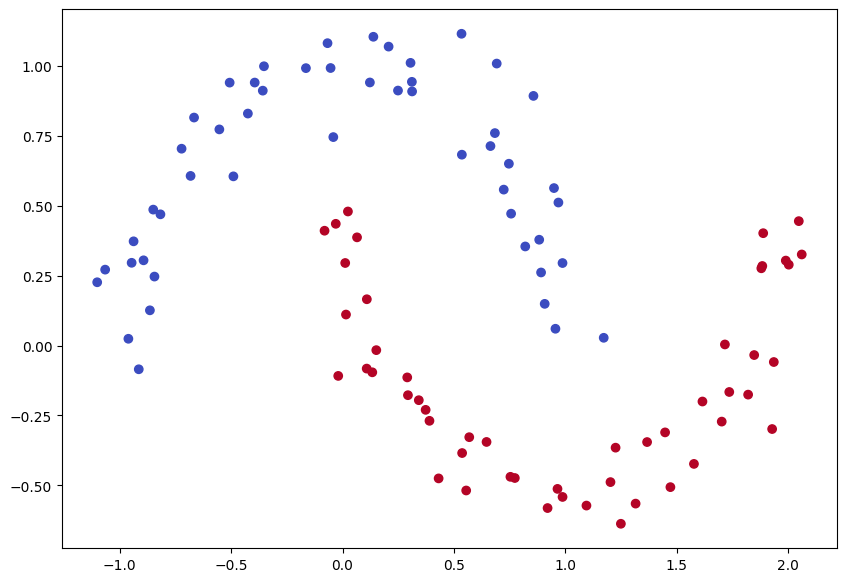

In [40]:
# Plot the data
x1 = X[:,0] # all row and 0 column
x2 = X[:,1] # all row and 1 column
plt.figure(figsize = (10, 7))
plt.scatter(x1, x2, c = y, cmap = plt.cm.coolwarm)


In [41]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


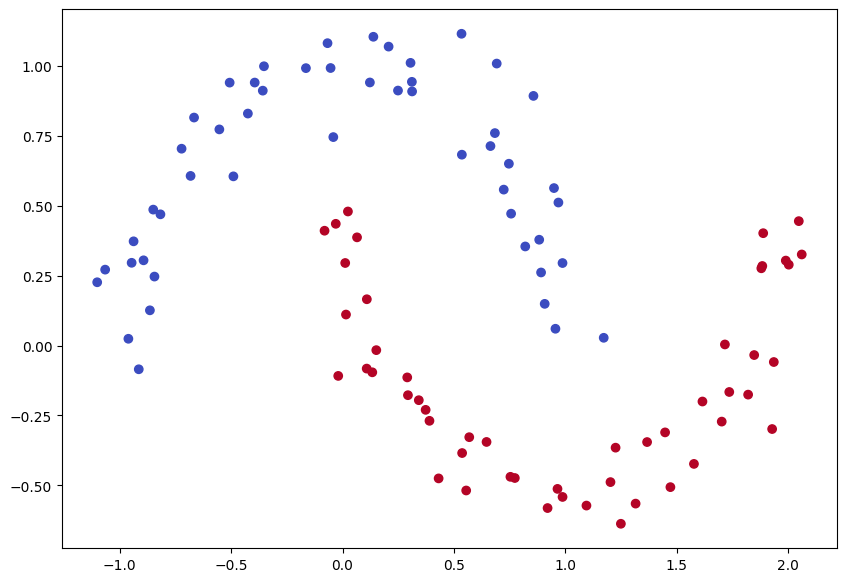

In [42]:
# Plot the data
x1 = X[:, 0]
x2 = X[:, 1]
plt.figure(figsize=(10, 7))
plt.scatter(x1, x2, c=y.reshape(-1), cmap=plt.cm.coolwarm)
plt.show()

In [44]:
# Reshape y to a 2D array
y = y.reshape(y.shape[0], 1)

In [45]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [46]:
# Function to define parameters
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        w = np.random.randn(weights[i], weights[i + 1])
        b = np.random.randn(1, weights[i + 1])
        weight_list.append(w)
        bias_list.append(b)
    return weight_list, bias_list

In [47]:
# Define Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [48]:
# Define Feed Forward Neural Network
def predictions(w, b, X):
    zh = np.dot(X, w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)
    return ao

In [49]:
# Define cost function
def find_cost(a0, y):
    m = y.shape[0]
    total_cost = (1/m) * np.sum(np.square(a0 - y))
    return total_cost

In [50]:
# Implement backpropagation with derivatives
def find_derivatives(w, b, X, y):
    zh = np.dot(X, w[0]) + b[0]
    ah = sigmoid(zh)
    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)

    # Backpropagation phase 1
    m = y.shape[0]
    dcost_dao = ao - y
    dao_dzo = sigmoid_der(zo)
    dzo_dwo = ah.T
    dwo = np.dot(dzo_dwo, dcost_dao * dao_dzo)
    dbo = np.sum(dcost_dao * dao_dzo, axis=0, keepdims=True)

    # Backpropagation phase 2
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = w[1].T
    dcost_dah = np.dot(dcost_dzo, dzo_dah)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah, axis=0, keepdims=True)

    return dwh, dbh, dwo, dbo


In [51]:
# Update weights function
def update_weights(w, b, dwh, dbh, dwo, dbo, lr):
    w[0] -= lr * dwh
    w[1] -= lr * dwo
    b[0] -= lr * dbh
    b[1] -= lr * dbo
    return w, b

In [52]:
# Neural Network function
def my_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w, b = define_parameters([input_len, 4, output_len])
    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives(w, b, X, y)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)
        if i % 50 == 0:
            print(f"Cost at epoch {i}: {cost}")
    return w, b, error_list

In [54]:
# Set learning rate and epochs
lr = 0.5
epochs = 2000

# Train the neural network
w, b, error_list = my_neural_network(X, y, lr, epochs)


Cost at epoch 0: 0.3062266506114698
Cost at epoch 50: 0.08988729780721814
Cost at epoch 100: 0.08797033821702341
Cost at epoch 150: 0.08412131915322146
Cost at epoch 200: 0.04858636951131434
Cost at epoch 250: 0.008106832565067725
Cost at epoch 300: 0.0041371159811536655
Cost at epoch 350: 0.0026619997265185146
Cost at epoch 400: 0.0019107602880909888
Cost at epoch 450: 0.0014647588762754821
Cost at epoch 500: 0.0011740204529927139
Cost at epoch 550: 0.0009718297968530218
Cost at epoch 600: 0.0008243176500449517
Cost at epoch 650: 0.0007126394870292841
Cost at epoch 700: 0.0006255632606777258
Cost at epoch 750: 0.0005560216268062561
Cost at epoch 800: 0.0004993680893911642
Cost at epoch 850: 0.000452434585427967
Cost at epoch 900: 0.0004129938559033039
Cost at epoch 950: 0.0003794385408167596
Cost at epoch 1000: 0.0003505821227532838
Cost at epoch 1050: 0.0003255312933661163
Cost at epoch 1100: 0.0003036017205006134
Cost at epoch 1150: 0.00028426103069858973
Cost at epoch 1200: 0.00026

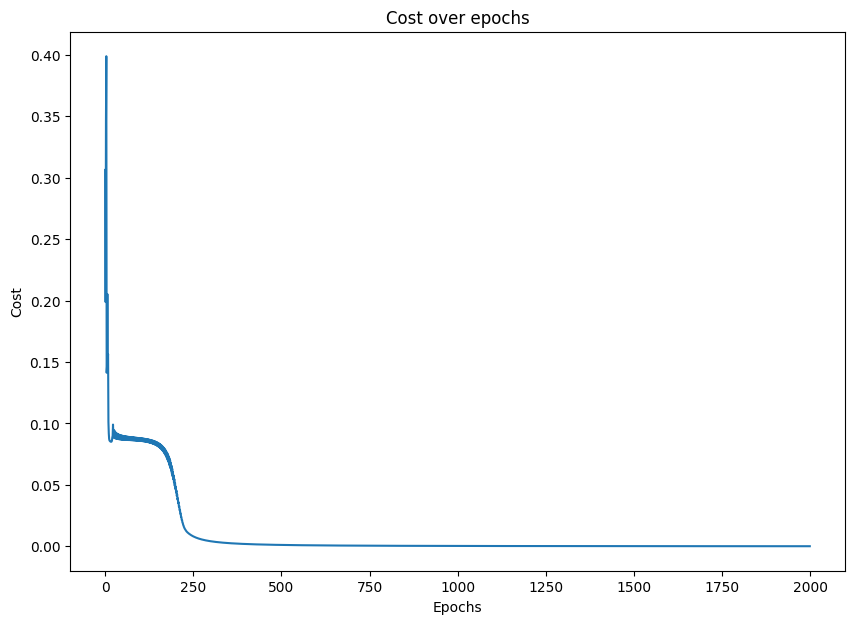

In [55]:
# Plot the error over epochs
plt.figure(figsize=(10, 7))
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over epochs')
plt.show()

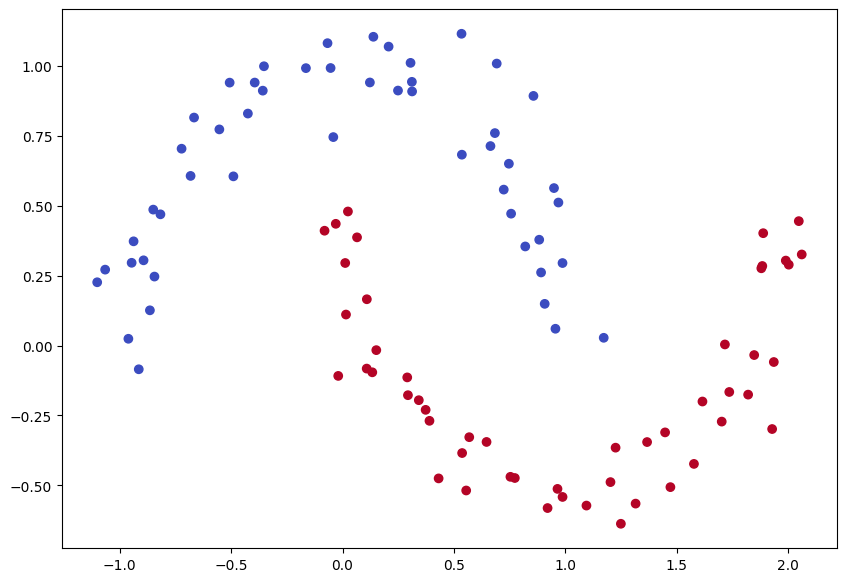

In [56]:
# Plot the data
x1 = X[:, 0]
x2 = X[:, 1]
plt.figure(figsize=(10, 7))
plt.scatter(x1, x2, c=y.reshape(-1), cmap=plt.cm.coolwarm)
plt.show()